<a href="https://colab.research.google.com/github/BigyanBhatta/Deep-Learning-Improvement/blob/main/dropout_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [3]:
X_train = np.linspace(-1, 1, 20)
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)
X_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

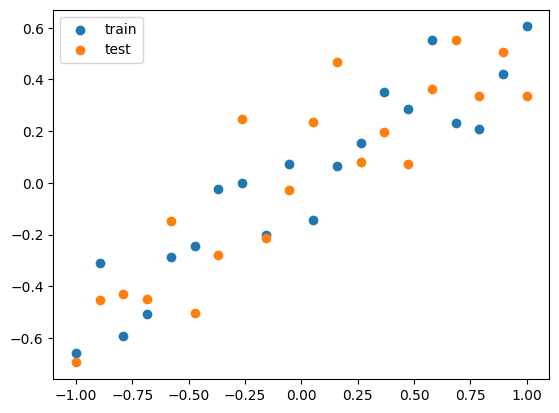

In [9]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.show()

In [10]:
model =Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16897 (66.00 KB)
Trainable params: 16897 (66.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
history = model.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 2/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 3/500
1/1 [==============================] - 0s 73ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 4/500
1/1 [==============================] - 0s 70ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 5/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 7/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 8/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0128 - mse: 0.0128

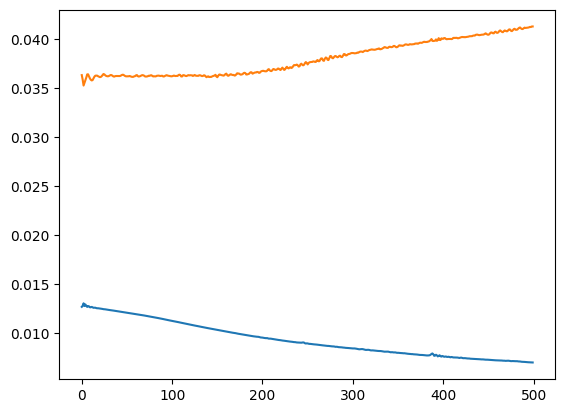

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 489ms/step


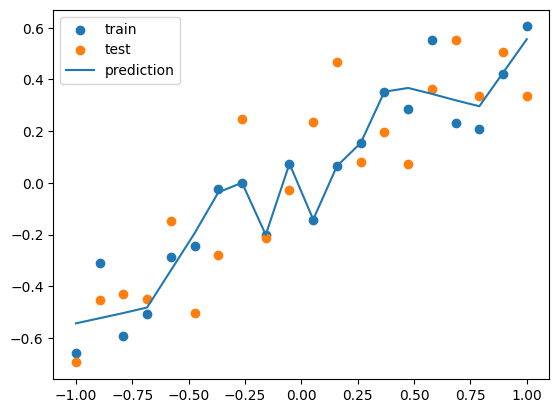

In [19]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.plot(X_test, y_pred, label = 'prediction')
plt.legend()
plt.show()


In [29]:
model1 =Sequential()
model1.add(Dense(128, activation = 'relu', input_dim = 1))
model1.add(Dropout(0.1))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'linear'))


In [30]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               256       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16897 (66.00 KB)
Trainable params: 16897 (66.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
history1 = model1.fit(X_train, X_test, epochs = 500, validation_data = (X_test, y_test))

Epoch 1/500
1/1 [==============================] - 1s 987ms/step - loss: 0.3802 - mse: 0.3802 - val_loss: 0.1218 - val_mse: 0.1218
Epoch 2/500
1/1 [==============================] - 0s 39ms/step - loss: 0.3496 - mse: 0.3496 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 3/500
1/1 [==============================] - 0s 36ms/step - loss: 0.2799 - mse: 0.2799 - val_loss: 0.0811 - val_mse: 0.0811
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 0.2725 - mse: 0.2725 - val_loss: 0.0653 - val_mse: 0.0653
Epoch 5/500
1/1 [==============================] - 0s 41ms/step - loss: 0.2324 - mse: 0.2324 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 6/500
1/1 [==============================] - 0s 59ms/step - loss: 0.1967 - mse: 0.1967 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 7/500
1/1 [==============================] - 0s 54ms/step - loss: 0.1733 - mse: 0.1733 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 8/500
1/1 [==============================] - 0s 38ms/step - loss: 0.1369 - mse: 0.1

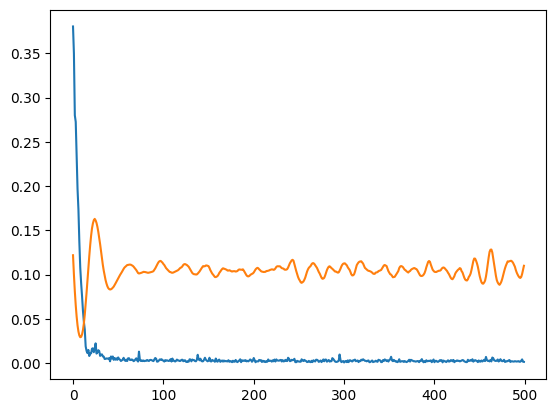

In [32]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [33]:
y_pred1 = model1.predict(X_test)

1/1 [==============================] - 0s 60ms/step


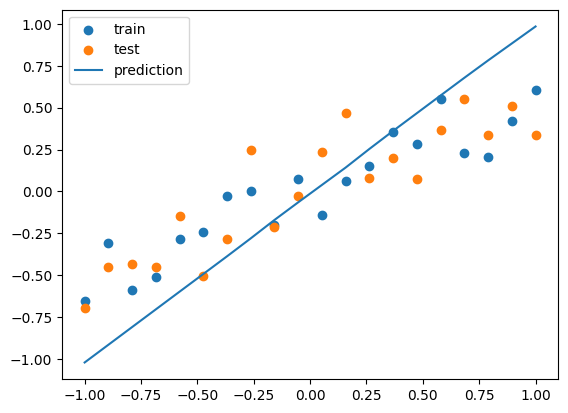

In [34]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.plot(X_test, y_pred1, label = 'prediction')
plt.legend()
plt.show()